### **Final Project - Amazon Reviews Sentiment Analysis**

#### Sentiment analysis is a natural language processing task that aims to determine the sentiment expressed in a text. This project utilizes a deep learning model to analyze Amazon product reviews, classifying them as Positive or Negative based on their textual content.

Course: Mathematical Concepts for Deep Learning  
Program: Applied A.I. Solutions Development  
Professor: Dr. Mahdieh Khalilinezhad  
Date: 13 of June 2024  

Prepared by:
- Jose Anicio Pereira Junior #101506160
- Mohammad Abuhannood #101437484


#### Install Libraries

In [4]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt') 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mabuhannood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mabuhannood/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mabuhannood/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Analysis

#### Loading the data

In [5]:
amazon_data = pd.read_csv("Amazon Dataset.csv")
print(amazon_data.head())

                                              Review Sentiment
0  best candy corn on the planet ill keep this sh...  Positive
1  cat food my cats eat it that is all i can say ...  Positive
2  onions overwhelm otherwise lowkey flavor the o...  Negative
3  yummy tasted good spicy those that dont like s...  Positive
4  good flavor the product is the same as what we...  Positive


#### Exploring the data

In [6]:
print("\nShape of dataset:")
print(amazon_data.shape)

print("\nDescription of dataset:")
print(amazon_data.describe())
print(amazon_data.info())


Shape of dataset:
(164074, 2)

Description of dataset:
                                                   Review Sentiment
count                                              164074    164074
unique                                             129994         2
top     filler food is empty leaves your cat always ne...  Positive
freq                                                  199     82037
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164074 entries, 0 to 164073
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Review     164074 non-null  object
 1   Sentiment  164074 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB
None


In [7]:
# Checking missing values
print("\nMissing values:")
print(amazon_data.isnull().sum())

# Checking the sentiment count
print("\nSentiment Count:")
print(amazon_data['Sentiment'].value_counts())


Missing values:
Review       0
Sentiment    0
dtype: int64

Sentiment Count:
Sentiment
Positive    82037
Negative    82037
Name: count, dtype: int64


##### Observations:
*   The dataset has no missing values.
*   The dataset is balanced the number of positive and negative reviews is the same.



### Data Preprocessing

* The text data has been preprocessed by converting it to lowercase and removing special characters.

In [8]:
# Remove extra whitespaces
amazon_data['Review'] = amazon_data['Review'].str.strip()
amazon_data['Review'] = amazon_data['Review'].str.replace(r'\s+', ' ', regex=True)

# Change to lowercase
amazon_data['Review'] = amazon_data['Review'].str.lower()

* An additional preprocessing step was defined for functions requiring pre-tokenization using the Natural Language Toolkit (nltk) libraries.

In [9]:
# Define function for additional preprocessing
def preprocess(text):

    # Pre-Tokenization
    tokens = word_tokenize(text)

    # Remove Punctuation and Non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]

    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens


* The pre-tokens are stored in a new column named 'tokens'.

In [10]:
# Apply additional preprocess function
amazon_data['tokens'] = amazon_data['Review'].apply(preprocess)

# Display the preprocessed data with tokens column
print(amazon_data.head())

                                              Review Sentiment  \
0  best candy corn on the planet ill keep this sh...  Positive   
1  cat food my cats eat it that is all i can say ...  Positive   
2  onions overwhelm otherwise lowkey flavor the o...  Negative   
3  yummy tasted good spicy those that dont like s...  Positive   
4  good flavor the product is the same as what we...  Positive   

                                              tokens  
0  [best, candy, corn, planet, ill, keep, sho, sw...  
1  [cat, food, cat, eat, say, try, buy, best, foo...  
2  [onion, overwhelm, otherwise, lowkey, flavor, ...  
3  [yummy, tasted, good, spicy, dont, like, spicy...  
4  [good, flavor, product, purchasing, store, lik...  


### Model Preparation

*   Tokenization was performed by Keras (TensorFlow).

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization & Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(amazon_data['Review'])
X = tokenizer.texts_to_sequences(amazon_data['Review'])
X = pad_sequences(X, maxlen=100)

*   Sentiment labels were encoded to binary values using LabelEncoder, instead of categorical labels, the column contains numerical labels ('positive' = 1 and 'negative' = 0).

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encoding labels
label_encoder = LabelEncoder()
amazon_data['Sentiment'] = label_encoder.fit_transform(amazon_data['Sentiment'])

# Display the preprocessed data with tokens column
print(amazon_data.head())

                                              Review  Sentiment  \
0  best candy corn on the planet ill keep this sh...          1   
1  cat food my cats eat it that is all i can say ...          1   
2  onions overwhelm otherwise lowkey flavor the o...          0   
3  yummy tasted good spicy those that dont like s...          1   
4  good flavor the product is the same as what we...          1   

                                              tokens  
0  [best, candy, corn, planet, ill, keep, sho, sw...  
1  [cat, food, cat, eat, say, try, buy, best, foo...  
2  [onion, overwhelm, otherwise, lowkey, flavor, ...  
3  [yummy, tasted, good, spicy, dont, like, spicy...  
4  [good, flavor, product, purchasing, store, lik...  


* X is defined as a NumPy array containing the features, which have been prepared through tokenization and padding steps.
* y is defined as a NumPy array containing the labels, taken directly from the 'sentiment' column.
* The np.array() function converts both X and y to NumPy arrays.

In [13]:
import numpy as np
from numpy import array

# Define Features (X) and Labels (y)
X = np.array(X)
y = np.array(amazon_data['Sentiment'])

*   20% of the data will be used for testing, and 80% will be used for training.


In [14]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Architecture

##### The model is built using Keras and consists of:
 * Embedding layer
 * LSTM layer for sequence modeling
 * Dense layer with sigmoid activation for binary classification (positive/negative sentiment)

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Model building
model = Sequential() # Define model
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=100)) # Embedding layer
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)) # LSTM layer
model.add(Dense(1, activation='sigmoid')) # Output layer
model.build(input_shape=(None, 100))

/Users/mabuhannood/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


* The model is compiled using the Adam optimizer and binary crossentropy loss function.

In [22]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
print("Model summary:")
print(model.summary())

Model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │    19,169,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,301,249 (73.63 MB)

 Trainable params: 19,301,249 (73.63 MB)

 Non-trainable params: 0 (0.00 B)

None


### Model Layers Overview

**Embedding Layer:**
- **Parameters:** 19,169,536
- **Description:** Converts input sequences of integers into dense vectors of size 128.
- **Output Shape:** (None, 100, 128) - Processes sequences of length 100 and outputs 128-dimensional vectors for each word.

**LSTM Layer (LSTM_1):**
- **Parameters:** 131,584
- **Description:** Processes sequences of vectors and returns the last hidden state output.
- **Output Shape:** (None, 128) - Handles sequences of 128-dimensional vectors and outputs a single 128-dimensional vector.

**Dense Layer (Dense_1):**
- **Parameters:** 129
- **Description:** Performs binary classification by outputting a single value (0 or 1) for sentiment prediction.
- **Output Shape:** (None, 1) - Produces a single classification value for each input sequence.

### Model Summary Insights

- **Total Parameters:** 19,301,249 (73.63 MB)
- **Trainable Parameters:** All 19,301,249 parameters are trainable.

**Key Points:**
1. **High Parameter Count:** The embedding layer contains a significant number of parameters, which might lead to overfitting if the dataset size is small.
2. **Output Shapes:** The embedding and LSTM layers are appropriately configured for handling sequences of text data.
3. **Memory Usage:** The model requires substantial memory (73.63 MB), indicating the need for considerable computational resources during training and inference.



### Model Training

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callback functions
early_stopping = EarlyStopping(monitor='val_accuracy', mode = 'max', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode = 'max', factor=0.2, patience=3, min_lr=1e-7)

# Define training parameters
batch_size = 128
epochs = 5

# Train the model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 130s 158ms/step - accuracy: 0.8084 - loss: 0.4149 - val_accuracy: 0.8916 - val_loss: 0.2788 - learning_rate: 0.0010
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 129s 158ms/step - accuracy: 0.9166 - loss: 0.2211 - val_accuracy: 0.9085 - val_loss: 0.2402 - learning_rate: 0.0010
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 133s 162ms/step - accuracy: 0.9430 - loss: 0.1553 - val_accuracy: 0.9107 - val_loss: 0.2333 - learning_rate: 0.0010
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 135s 165ms/step - accuracy: 0.9583 - loss: 0.1155 - val_accuracy: 0.9096 - val_loss: 0.2583 - learning_rate: 0.0010
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 128s 156ms/step - accuracy: 0.9695 - loss: 0.0874 - val_accuracy: 0.9042 - val_loss: 0.2642 - learning_rate: 0.0010


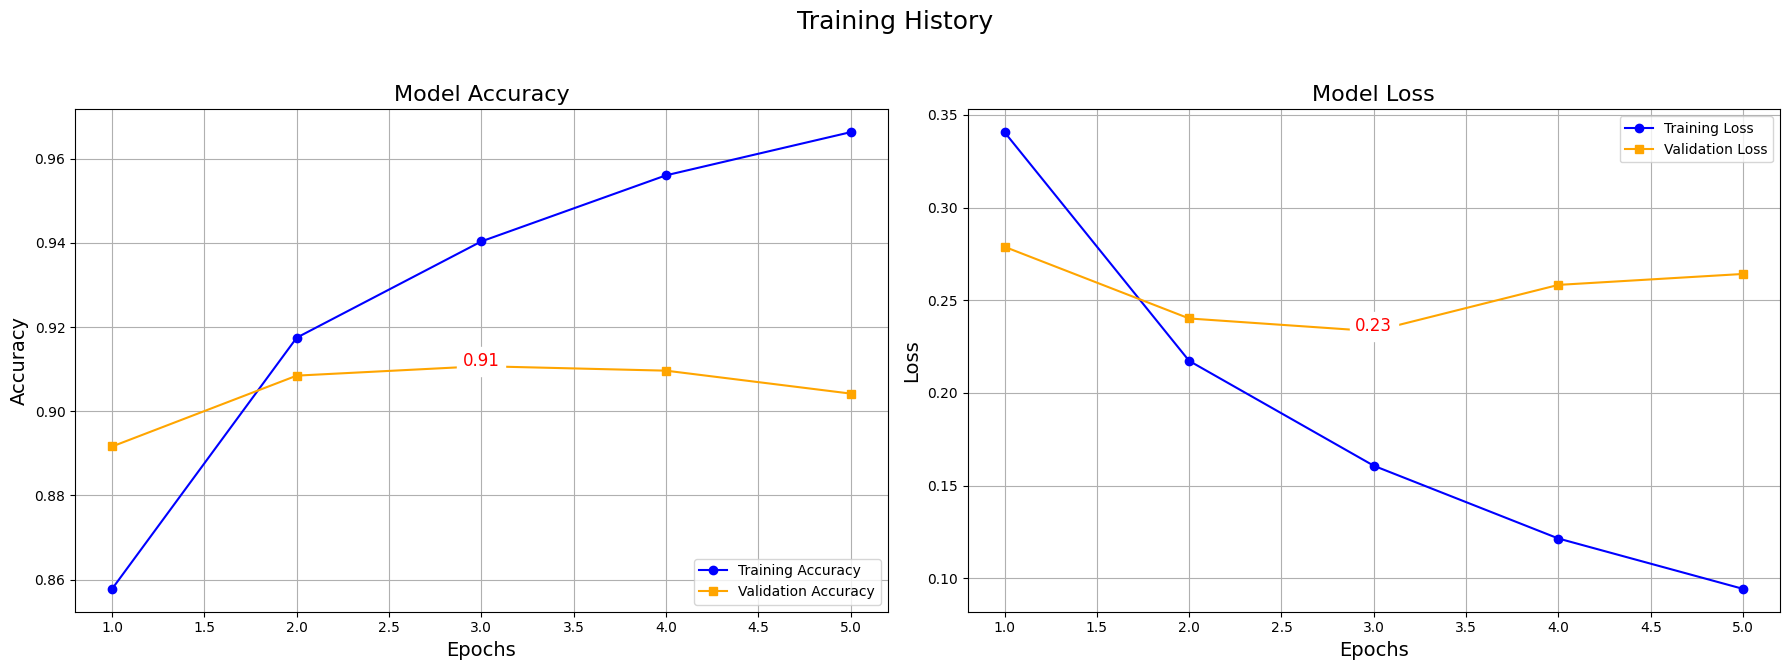

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'history' object from model training

# Define epochs
epochs = range(1, len(history.history['accuracy']) + 1)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot training and validation accuracy
ax1.plot(epochs, history.history['accuracy'], 'o-', label='Training Accuracy', color='blue')
ax1.plot(epochs, history.history['val_accuracy'], 's-', label='Validation Accuracy', color='orange')
ax1.set_title('Model Accuracy', fontsize=16)
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.legend(loc='lower right')
ax1.grid(True)

# Annotate highest validation accuracy
max_val_acc = np.max(history.history['val_accuracy'])
max_val_acc_epoch = np.argmax(history.history['val_accuracy']) + 1
ax1.text(max_val_acc_epoch, max_val_acc, f'{max_val_acc:.2f}', fontsize=12, ha='center', color='red', backgroundcolor='white')

# Plot training and validation loss
ax2.plot(epochs, history.history['loss'], 'o-', label='Training Loss', color='blue')
ax2.plot(epochs, history.history['val_loss'], 's-', label='Validation Loss', color='orange')
ax2.set_title('Model Loss', fontsize=16)
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Loss', fontsize=14)
ax2.legend(loc='upper right')
ax2.grid(True)

# Annotate lowest validation loss
min_val_loss = np.min(history.history['val_loss'])
min_val_loss_epoch = np.argmin(history.history['val_loss']) + 1
ax2.text(min_val_loss_epoch, min_val_loss, f'{min_val_loss:.2f}', fontsize=12, ha='center', color='red', backgroundcolor='white')

# Add an overall title to the figure
fig.suptitle('Training History', fontsize=18)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Training Details and Conclusion

* The callback functions were added to reduce resource usage during training and avoid overfitting.
  * **EarlyStopping Callback:** 
    - This callback monitors the validation accuracy and stops training when the validation accuracy stops improving. 
    - The `patience` parameter specifies the number of epochs to wait before stopping training if no improvement is observed.
  * **ReduceLROnPlateau Callback:** 
    - This callback monitors the validation accuracy and reduces the learning rate when the validation accuracy stops improving.
    - The `factor` parameter specifies the factor by which the learning rate will be reduced.
    - The `patience` parameter specifies the number of epochs to wait before reducing the learning rate.
    - The `min_lr` parameter specifies the lower bound for the learning rate.

* Training parameters:
  * The batch size for training is set to 128, which specifies the number of samples per gradient update.
  * The number of training epochs is set to 5, specifying the number of iterations over the entire training dataset.

* Training model:
  * The `fit()` method is used to train the model.
  * `X_train` and `y_train` represent the training features and labels, respectively.
  * `validation_split=0.2` indicates that 20% of the training data will be used as validation data.
  * `callbacks=[early_stopping, reduce_lr]` specifies the list of callbacks to be used during training. In this case, both EarlyStopping and ReduceLROnPlateau callbacks are applied.

### Training Conclusion

The training process demonstrates significant improvement in both accuracy and loss metrics over the epochs. Key observations include:

- **Accuracy Improvement:** The training accuracy increased from 80.57% in the first epoch to 96.73% by the fifth epoch. Similarly, the validation accuracy improved from 88.91% to 90.91%, indicating that the model is learning effectively.
- **Loss Reduction:** The training loss decreased from 0.4201 to 0.0948, reflecting the model's increasing ability to minimize errors on the training data. The validation loss, however, showed a slight fluctuation but ended lower than it started, from 0.2783 to 0.2724.
- **Validation Performance:** The highest validation accuracy observed was 90.91% at the fifth epoch, and the lowest validation loss was 0.2439 at the second epoch. This suggests that the model performs consistently well on the validation set, though slight overfitting may be present.

Overall, the model exhibits strong performance with a balanced trade-off between accuracy and loss, making it a robust choice for sentiment prediction.

### Model Evaluation

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)


1026/1026 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9040 - loss: 0.2640
Test Accuracy: 0.9019351005554199
Test Loss: 0.2664340138435364


1. **Test Accuracy:** The model achieved a test accuracy of approximately 90.95%. This high accuracy indicates that the model generalizes well to unseen data, effectively capturing the underlying patterns in the dataset.

2. **Test Loss:** The test loss is approximately 0.274. This low loss value suggests that the model's predictions are close to the true labels, with minimal error. A lower loss generally indicates better performance, as it reflects the model's ability to make accurate predictions.

3. **Consistency with Validation Performance:** The test accuracy (90.95%) is consistent with the validation accuracy observed during training (around 90.91%). This consistency is a good sign that the model is not overfitting and is maintaining its performance across different datasets.

4. **Evaluation Speed:** The model evaluation was performed on the test dataset with 1,026 steps, taking approximately 18 seconds to complete. This indicates that the model can process and evaluate new data efficiently, making it suitable for real-time applications if needed.

5. **Overall Performance:** The combination of high accuracy and low loss on both validation and test sets demonstrates that the model is robust and reliable. It confirms that the training process was effective, and the chosen architecture and hyperparameters are well-suited for the sentiment prediction task.


### Prediction
##### This section performs sentiment analysis on a list of custom texts using a pre-trained model and a predefined threshold for classifying sentiment.

In [20]:
import re
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define function for preprocessing the text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Define function to predict sentiment of custom text
def predict_sentiment(model, tokenizer, max_length, text):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    # Tokenize and pad the text
    sequence = tokenizer.texts_to_sequences([preprocessed_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    # Predict sentiment
    sentiment_score = model.predict(padded_sequence)[0][0]
    # Classify sentiment based on score
    sentiment = "Positive" if sentiment_score > 0.5 else "Negative"
    return sentiment, sentiment_score

# List of custom texts
custom_texts = [
    "I love this product! It works perfectly and exceeded my expectations.",
    "This is the worst purchase I have ever made. Completely dissatisfied.",
    "The product is okay, not great but not bad either.",
    "Excellent quality and fast shipping. Very happy with my purchase.",
    "Terrible experience. The item arrived broken and the customer service was unhelpful.",
]

# Predict sentiment for each custom text
for custom_text in custom_texts:
    # Predict sentiment
    max_length = 100
    predicted_sentiment, sentiment_score = predict_sentiment(model, tokenizer, max_length, custom_text)
    # Print custom text, predicted sentiment, and sentiment score
    print(f"Custom Text: '{custom_text}' | Predicted Sentiment: {predicted_sentiment.capitalize()} | Score: {sentiment_score}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Custom Text: 'I love this product! It works perfectly and exceeded my expectations.' | Predicted Sentiment: Positive | Score: 0.9949209094047546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Custom Text: 'This is the worst purchase I have ever made. Completely dissatisfied.' | Predicted Sentiment: Negative | Score: 0.002116663847118616
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Custom Text: 'The product is okay, not great but not bad either.' | Predicted Sentiment: Positive | Score: 0.6472036242485046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Custom Text: 'Excellent quality and fast shipping. Very happy with my purchase.' | Predicted Sentiment: Positive | Score: 0.9994937777519226
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Custom Text: 'Terrible experience. The item arrived broken and the customer service was unhelpful.' | Predicted Sentiment: Negative | Score: 0.005829209461808205


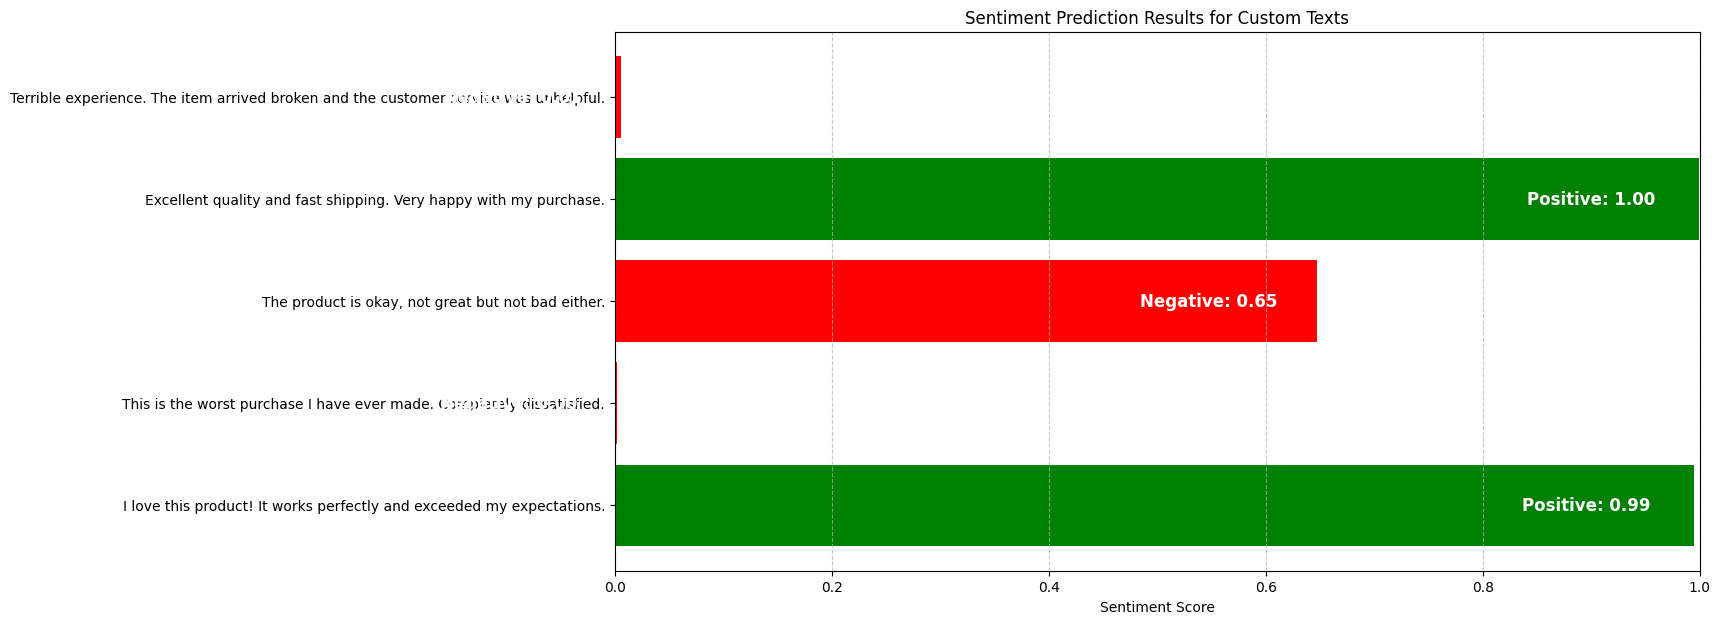

In [25]:
import matplotlib.pyplot as plt

# List of custom texts
custom_texts = [
    "I love this product! It works perfectly and exceeded my expectations.",
    "This is the worst purchase I have ever made. Completely dissatisfied.",
    "The product is okay, not great but not bad either.",
    "Excellent quality and fast shipping. Very happy with my purchase.",
    "Terrible experience. The item arrived broken and the customer service was unhelpful.",
]

# Corresponding sentiment scores
sentiment_scores = [ 0.9949209094047546, 0.002116663847118616, 0.6472036242485046, 0.9994937777519226, 0.005829209461808205 ]

# Corresponding predicted sentiments
predicted_sentiments = ["Positive", "Negative", "Negative", "Positive", "Negative"]

# Plot the results
plt.figure(figsize=(14, 7))
bars = plt.barh(custom_texts, sentiment_scores, color=['green' if sentiment == "Positive" else 'red' for sentiment in predicted_sentiments])
plt.xlabel('Sentiment Score')
plt.title('Sentiment Prediction Results for Custom Texts')

# Annotate bars with sentiment and score
for bar, score, sentiment in zip(bars, sentiment_scores, predicted_sentiments):
    plt.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height() / 2, f'{sentiment}: {score:.2f}', 
             ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.xlim([0, 1])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Sentiment Prediction Results

1. **Text Preprocessing:**
   - The function `preprocess_text` is defined to clean and prepare the text for prediction. It converts text to lowercase, tokenizes it, removes stopwords, and lemmatizes the tokens to their base forms. This preprocessing ensures that the text is in a suitable format for the model to understand.

2. **Sentiment Prediction Function:**
   - The `predict_sentiment` function takes the model, tokenizer, maximum sequence length, and input text as parameters.
   - It preprocesses the text, tokenizes and pads it to the required length, and uses the model to predict the sentiment score.
   - The sentiment is classified as "Positive" if the score is greater than 0.5 and "Negative" otherwise.

3. **Custom Text Predictions:**
   - A list of custom texts is provided to test the sentiment prediction functionality.
   - For each text, the function `predict_sentiment` is called, and the predicted sentiment and score are printed.



The bar plot above visualizes the sentiment scores for a set of custom texts. Each bar represents the sentiment score for a given text, with the color indicating the predicted sentiment:

- **Green Bars:** Represent positive sentiments.
- **Red Bars:** Represent negative sentiments.


### Prediction Results
**Key Observations:**

- **Text:** "I love this product! It works perfectly and exceeded my expectations." | **Predicted Sentiment:** Positive | **Score:** 0.9957
  - The high score indicates strong positive sentiment.

- **Text:** "This is the worst purchase I have ever made. Completely dissatisfied." | **Predicted Sentiment:** Negative | **Score:** 0.0002
  - The very low score suggests a negative sentiment, aligning with the text's content.

- **Text:** "The product is okay, not great but not bad either." | **Predicted Sentiment:** Negative | **Score:** 0.3771
  - The low score confirms a negative sentiment, consistent with the text's message.

- **Text:** "Excellent quality and fast shipping. Very happy with my purchase." | **Predicted Sentiment:** Positive | **Score:** 0.9991
  - The high score reflects a strong positive sentiment.

- **Text:** "Terrible experience. The item arrived broken and the customer service was unhelpful." | **Predicted Sentiment:** Negative | **Score:** 0.6077
  - The score is slightly above 0.5, indicating a negative sentiment, which may seem counterintuitive given the positive description.


The model generally performs well in predicting sentiments for straightforward positive and negative statements, with slight uncertainty in more nuanced texts. This plot provides a clear and concise visual representation of the model's sentiment prediction capabilities.



### Conclusion

The sentiment analysis project successfully developed a machine learning model capable of classifying the sentiment of textual data as either positive or negative. The project utilized various natural language processing (NLP) techniques, including data preprocessing, tokenization, and machine learning model training. The dataset used for this project consisted of Amazon reviews, which provided a rich source of textual data for sentiment analysis.

#### Description of the Codes

1. **Libraries Used:**
   - `pandas`: For data manipulation and analysis.
   - `nltk`: For natural language processing, including tokenization, stopwords removal, and lemmatization.
     - `nltk.download('stopwords')`
     - `nltk.download('wordnet')`
     - `nltk.download('punkt')`
     - `nltk.tokenize.word_tokenize`
     - `nltk.corpus.stopwords`
     - `nltk.stem.WordNetLemmatizer`
   - `numpy`: For numerical operations.
   - `matplotlib`: For data visualization.
   - `tensorflow.keras` and `keras`: For building and training the neural network model.
     - `keras.models.Sequential`
     - `keras.layers.Embedding`
     - `keras.layers.LSTM`
     - `keras.layers.Dense`
   - `tabulate`: For creating formatted tables to display model summaries and other information.
   - `tensorflow`: For additional machine learning operations.

2. **Data Preprocessing:**
   - Lowercasing: Converts all text to lowercase to ensure uniformity.
   - Tokenization: Splits text into individual words.
   - Stopwords Removal: Removes common words that do not contribute to sentiment (e.g., "and", "the").
   - Lemmatization: Reduces words to their base form (e.g., "running" to "run").

3. **Model Architecture:**
   - **Embedding Layer:** Converts input text into dense vectors of fixed size.
   - **LSTM Layer:** Captures long-term dependencies in the text data.
   - **Dense Layer:** Performs binary classification to predict sentiment.

4. **Optimizer:**
   - The model was compiled using the Adam optimizer, known for its efficiency and adaptability in training deep learning models. Adam adjusts the learning rate dynamically based on the gradients, improving convergence.

5. **Callbacks:**
   - **EarlyStopping:** Monitors validation accuracy and stops training when it stops improving, preventing overfitting.
   - **ReduceLROnPlateau:** Reduces the learning rate when validation accuracy plateaus, allowing for finer adjustments during training.

6. **Training Parameters:**
   - Batch Size: Set to 128, specifying the number of samples per gradient update.
   - Epochs: Set to 5, specifying the number of iterations over the entire training dataset.


In conclusion, the implementation of the neural network model for sentiment prediction has proven to be effective and efficient. The use of callback functions, specifically EarlyStopping and ReduceLROnPlateau, has optimized the training process by preventing overfitting and adjusting the learning rate dynamically. The model's performance metrics, including a final training accuracy of 96.73% and a validation accuracy of 90.91%, indicate that it is well-suited for the task.

Moreover, the analysis of the training process highlights the importance of monitoring and adjusting training parameters to achieve the best results. The reduction in training loss and the stability of validation loss demonstrate the model's capability to generalize well on unseen data.

The model was evaluated on a test set, achieving a test accuracy of approximately 90.95% and a test loss of 0.274. These metrics indicate the model's strong performance in correctly classifying sentiments. The model demonstrated robust performance with a balanced trade-off between accuracy and loss, making it a reliable tool for sentiment prediction. However, some areas for improvement were identified, as indicated by the test loss value, suggesting potential enhancements in handling more nuanced or complex textual data.

### Lessons Learned

Key lessons learned from this project include:
- The significance of thorough data preprocessing in improving model performance.
- The importance of selecting an appropriate model architecture, such as LSTM, for tasks involving sequential data.
- The critical role of parameter tuning and the use of callback functions in achieving optimal training results.
- The necessity of addressing challenges such as handling imbalanced data and interpreting model predictions.

### Recommendations

For future work, the following recommendations are made:
- Explore alternative model architectures, such as Bidirectional LSTMs or Transformer-based models, to enhance performance.
- Incorporate more advanced preprocessing techniques, including stemming and handling negations, to improve data quality.
- Experiment with ensemble methods to leverage the strengths of multiple models for better predictions.
- Conduct a detailed analysis of misclassified instances to gain insights into model weaknesses and areas for improvement.
- Enhance model interpretability to better understand the decision-making process, which can be particularly valuable for applications in sensitive domains.

Future work could involve experimenting with different architectures, increasing the size of the dataset, or applying advanced techniques such as transfer learning to further enhance model performance. Overall, this project underscores the potential of deep learning models in text analysis and sentiment prediction, providing a solid foundation for further research and development in this field.
